<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Pre_processing_dataset_yudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration des données


In [2]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix


Télechargement du dataset

In [3]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv

--2023-05-15 08:09:42--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-15 08:09:43 (14.3 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-15 08:09:43--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [4]:
!ls

sample_data  testinputs.csv  traininginputs.csv  trainingoutput.csv


In [5]:
df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')


**Training Inputs**

In [6]:
df_training_inputs.shape

(34515, 14)

Changement des noms

In [7]:
df_training_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [8]:
df_training_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROC_TRACEINFO         34515 non-null  object 
 1   Premier angle          34515 non-null  float64
 2   SnapRingPeakForce      34515 non-null  float64
 3   Deuxième angle         34515 non-null  float64
 4   Rodage_I               34515 non-null  float64
 5   SnapRingFinalStroke    34515 non-null  float64
 6   Vissage_M8_torque      34515 non-null  float64
 7   Capuchon_insertion     15888 non-null  float64
 8   Rodage_U               34515 non-null  float64
 9   V1_torque              34515 non-null  float64
 10  StartLinePeakForce     34515 non-null  float64
 11  Vissage_M8_angle       34515 non-null  float64
 12  SnapRingMidPointForce  34515 non-null  float64
 13  V2_torque              34515 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.7+ MB


In [9]:
with pd.option_context('display.max_columns', df_training_inputs.shape[1]):
    print(df_training_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                        34515   34515.000000       34515.000000   
unique                       34515            NaN                NaN   
top     I-B-XA1207672-190429-00688            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.906922         156.915055   
std                            NaN      15.662650          11.271492   
min                            NaN     101.800000           0.000000   
25%                            NaN     148.700000         149.210000   
50%                            NaN     158.000000         156.180000   
75%                            NaN     169.300000         164.380000   
max                            NaN     198.300000         196.920000   

        Deuxième angle      Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count     34515.000000  34515.000000         34515.0000

**Test Inputs**

In [10]:
df_test_inputs.shape

(8001, 14)

In [11]:
df_test_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [12]:
df_test_inputs.describe()

,Premier angle,SnapRingPeakForce,Deuxième angle,Rodage_I,SnapRingFinalStroke,Vissage_M8_torque,Capuchon_insertion,Rodage_U,V1_torque,StartLinePeakForce,Vissage_M8_angle,SnapRingMidPointForce,V2_torque
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,3641.000000,8001.000000,8001.000000,8001.00000,8001.000000,8001.000000,8001.000000
mean,159.849919,156.836130,159.678965,113.379749,11.968191,12.254094,0.388753,11.971056,6.548061,23.58853,17.929671,97.607625,6.549979
std,15.624188,11.683895,15.238943,3.547692,0.266558,0.145903,0.024336,0.003082,0.097780,2.57426,6.709905,7.023431,0.095063
min,101.900000,0.000000,103.500000,102.420000,0.000000,0.570000,0.250000,11.970000,5.810000,0.00000,0.000000,0.000000,5.900000
25%,148.500000,148.970000,149.500000,111.090000,11.850000,12.210000,0.380000,11.970000,6.410000,22.23000,13.600000,94.290000,6.420000
50%,158.000000,156.220000,158.700000,113.200000,12.040000,12.250000,0.390000,11.970000,6.610000,23.82000,16.500000,98.410000,6.610000
75%,169.100000,164.490000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.24000,20.200000,102.230000,6.610000
max,198.200000,191.340000,198.000000,186.310000,12.150000,12.500000,0.420000,11.990000,6.660000,36.43000,72.600000,133.550000,6.680000


In [13]:
df_test_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROC_TRACEINFO         8001 non-null   object 
 1   Premier angle          8001 non-null   float64
 2   SnapRingPeakForce      8001 non-null   float64
 3   Deuxième angle         8001 non-null   float64
 4   Rodage_I               8001 non-null   float64
 5   SnapRingFinalStroke    8001 non-null   float64
 6   Vissage_M8_torque      8001 non-null   float64
 7   Capuchon_insertion     3641 non-null   float64
 8   Rodage_U               8001 non-null   float64
 9   V1_torque              8001 non-null   float64
 10  StartLinePeakForce     8001 non-null   float64
 11  Vissage_M8_angle       8001 non-null   float64
 12  SnapRingMidPointForce  8001 non-null   float64
 13  V2_torque              8001 non-null   float64
dtypes: float64(13), object(1)
memory usage: 875.2+ KB


In [14]:
with pd.option_context('display.max_columns', df_test_inputs.shape[1]):
    print(df_test_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                         8001    8001.000000        8001.000000   
unique                        8001            NaN                NaN   
top     I-B-XA1207672-190520-00632            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.849919         156.836130   
std                            NaN      15.624188          11.683895   
min                            NaN     101.900000           0.000000   
25%                            NaN     148.500000         148.970000   
50%                            NaN     158.000000         156.220000   
75%                            NaN     169.100000         164.490000   
max                            NaN     198.200000         191.340000   

        Deuxième angle     Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count      8001.000000  8001.000000          8001.000000

**Training output**

In [15]:
df_training_output.shape

(34515, 2)

In [16]:
df_training_output.describe()

,Binar OP130_Resultat_Global_v
count,34515.000000
mean,0.008837
std,0.093589
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
df_training_output.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [18]:
with pd.option_context('display.max_columns', df_training_output.shape[1]):
    print(df_training_output.describe(include='all'))
     

                    PROC_TRACEINFO  Binar OP130_Resultat_Global_v
count                        34515                   34515.000000
unique                       34515                            NaN
top     I-B-XA1207672-190429-00688                            NaN
freq                             1                            NaN
mean                           NaN                       0.008837
std                            NaN                       0.093589
min                            NaN                       0.000000
25%                            NaN                       0.000000
50%                            NaN                       0.000000
75%                            NaN                       0.000000
max                            NaN                       1.000000


**Histograme de chaqu'un**

Histogram Training input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

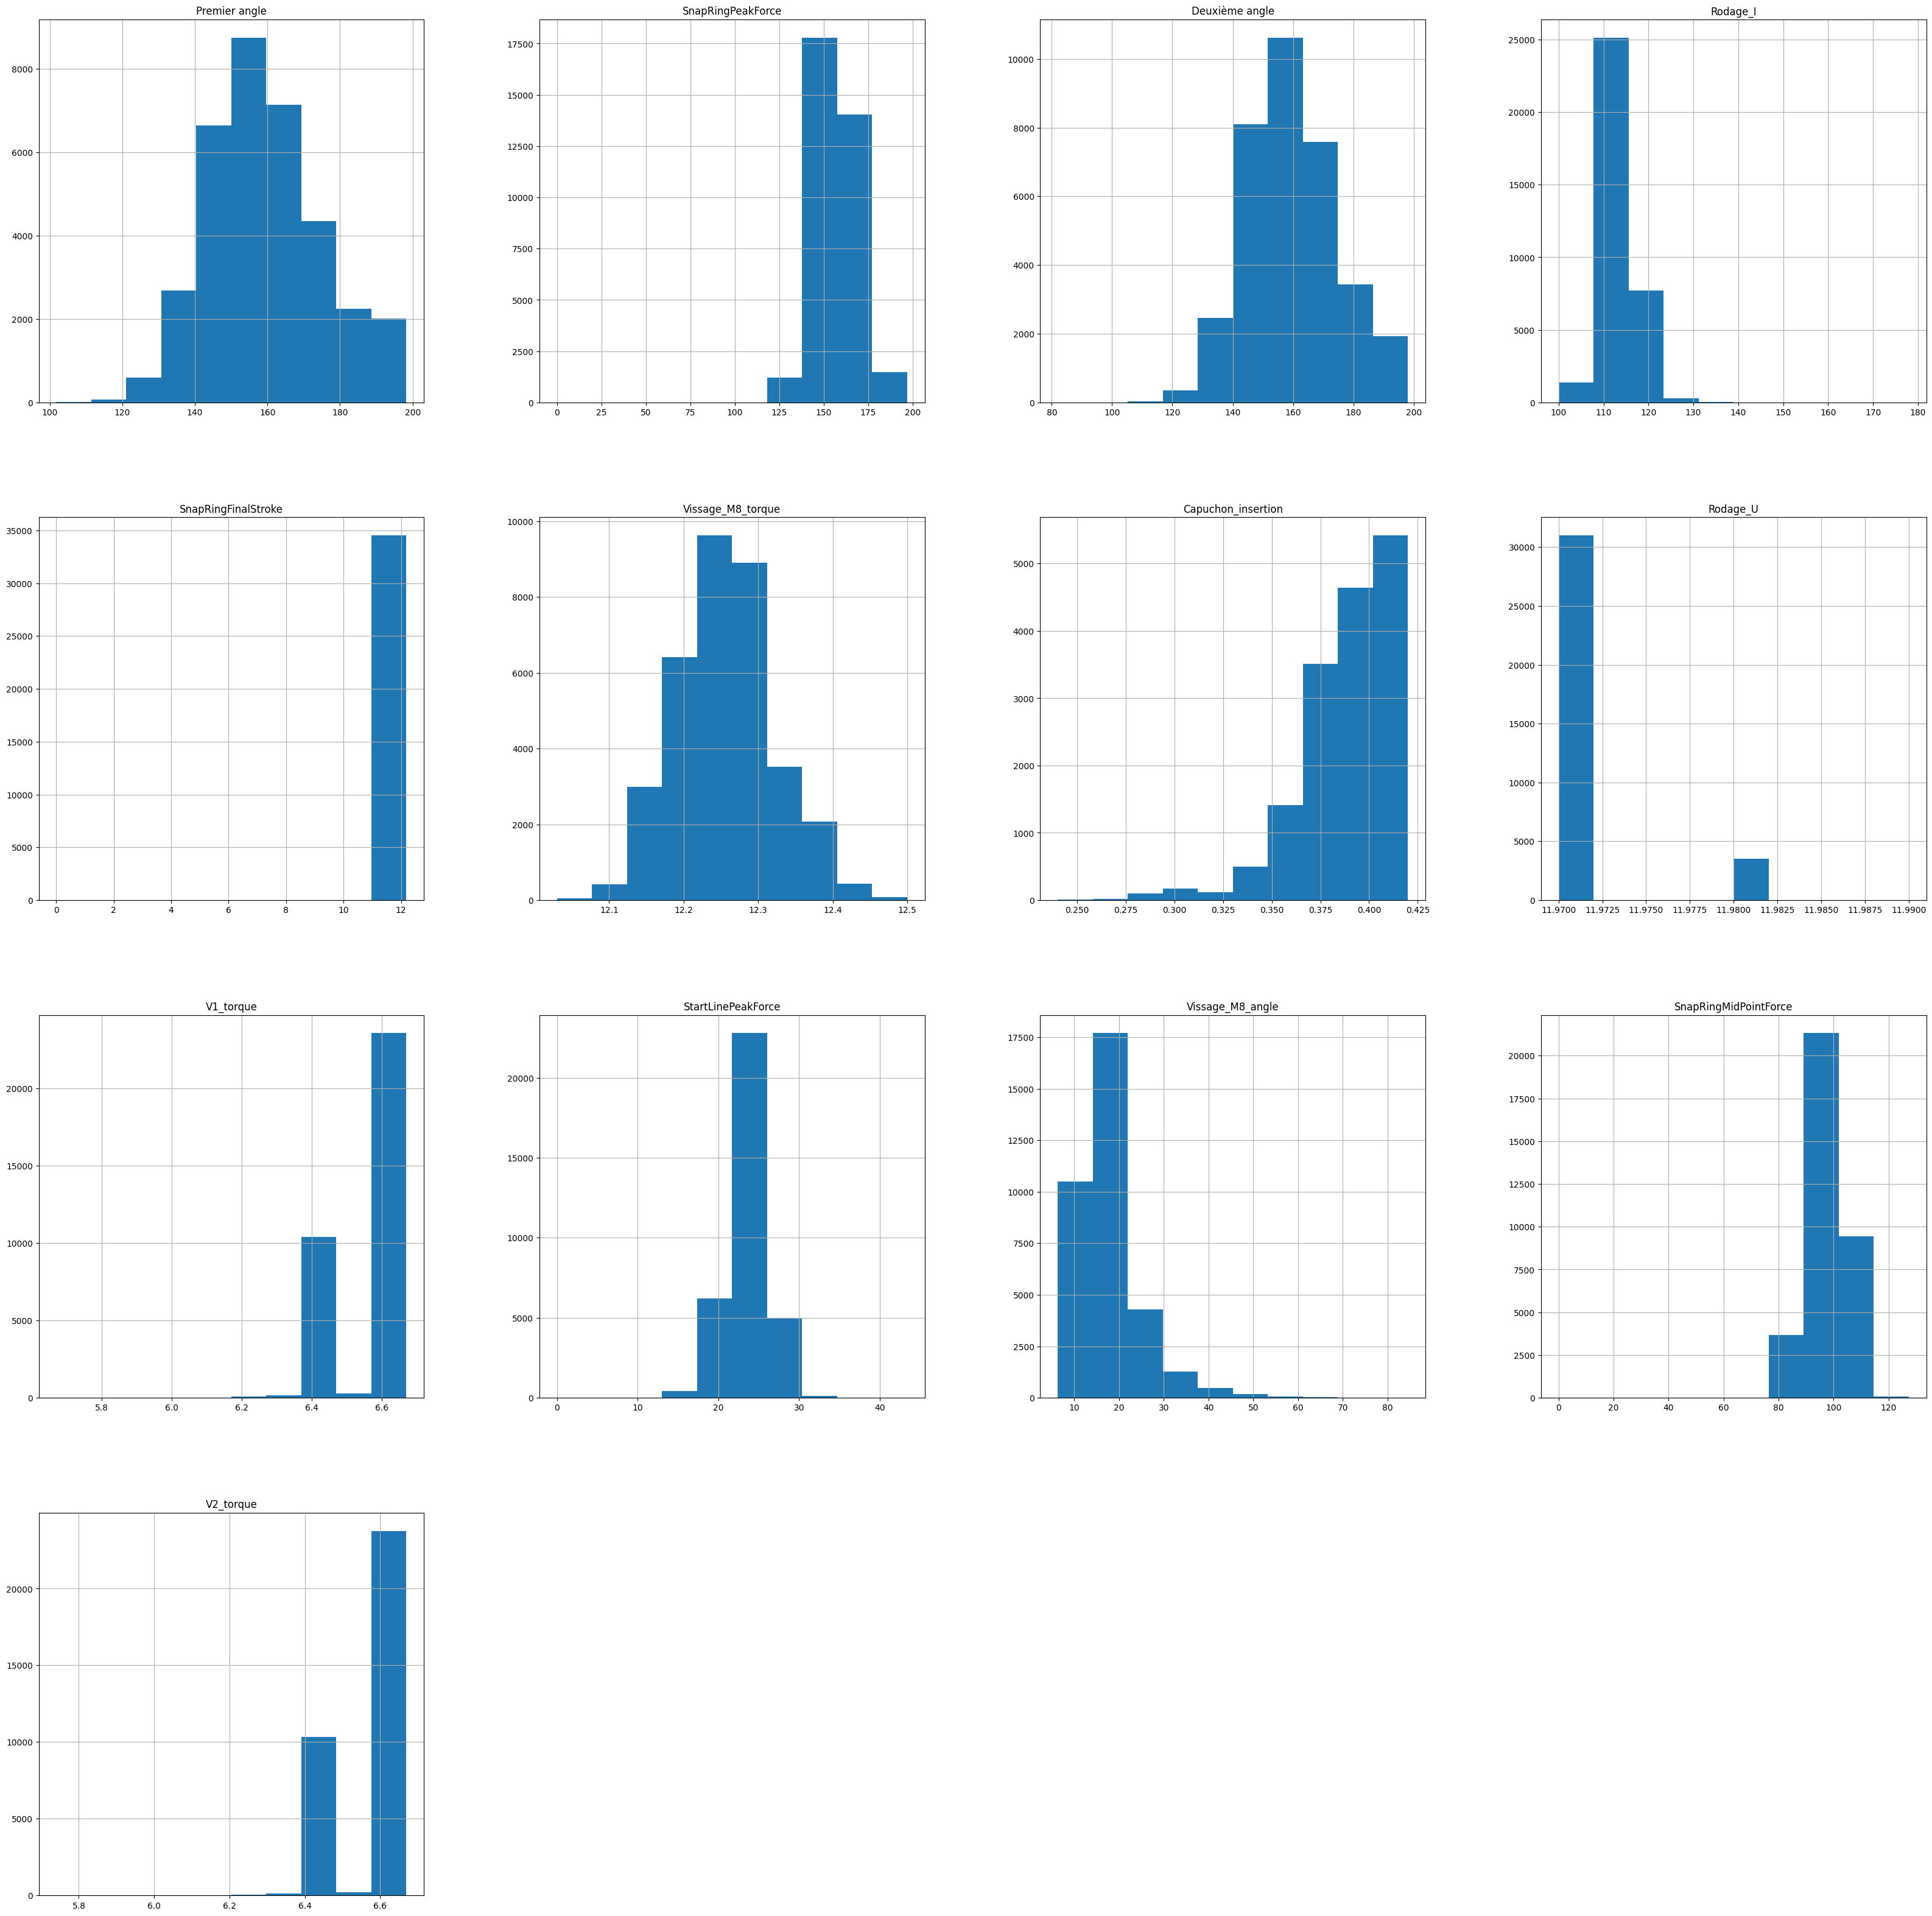

In [19]:
df_training_inputs.hist(layout = (4 , 4), figsize = (40,40))

Histogram Test Input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

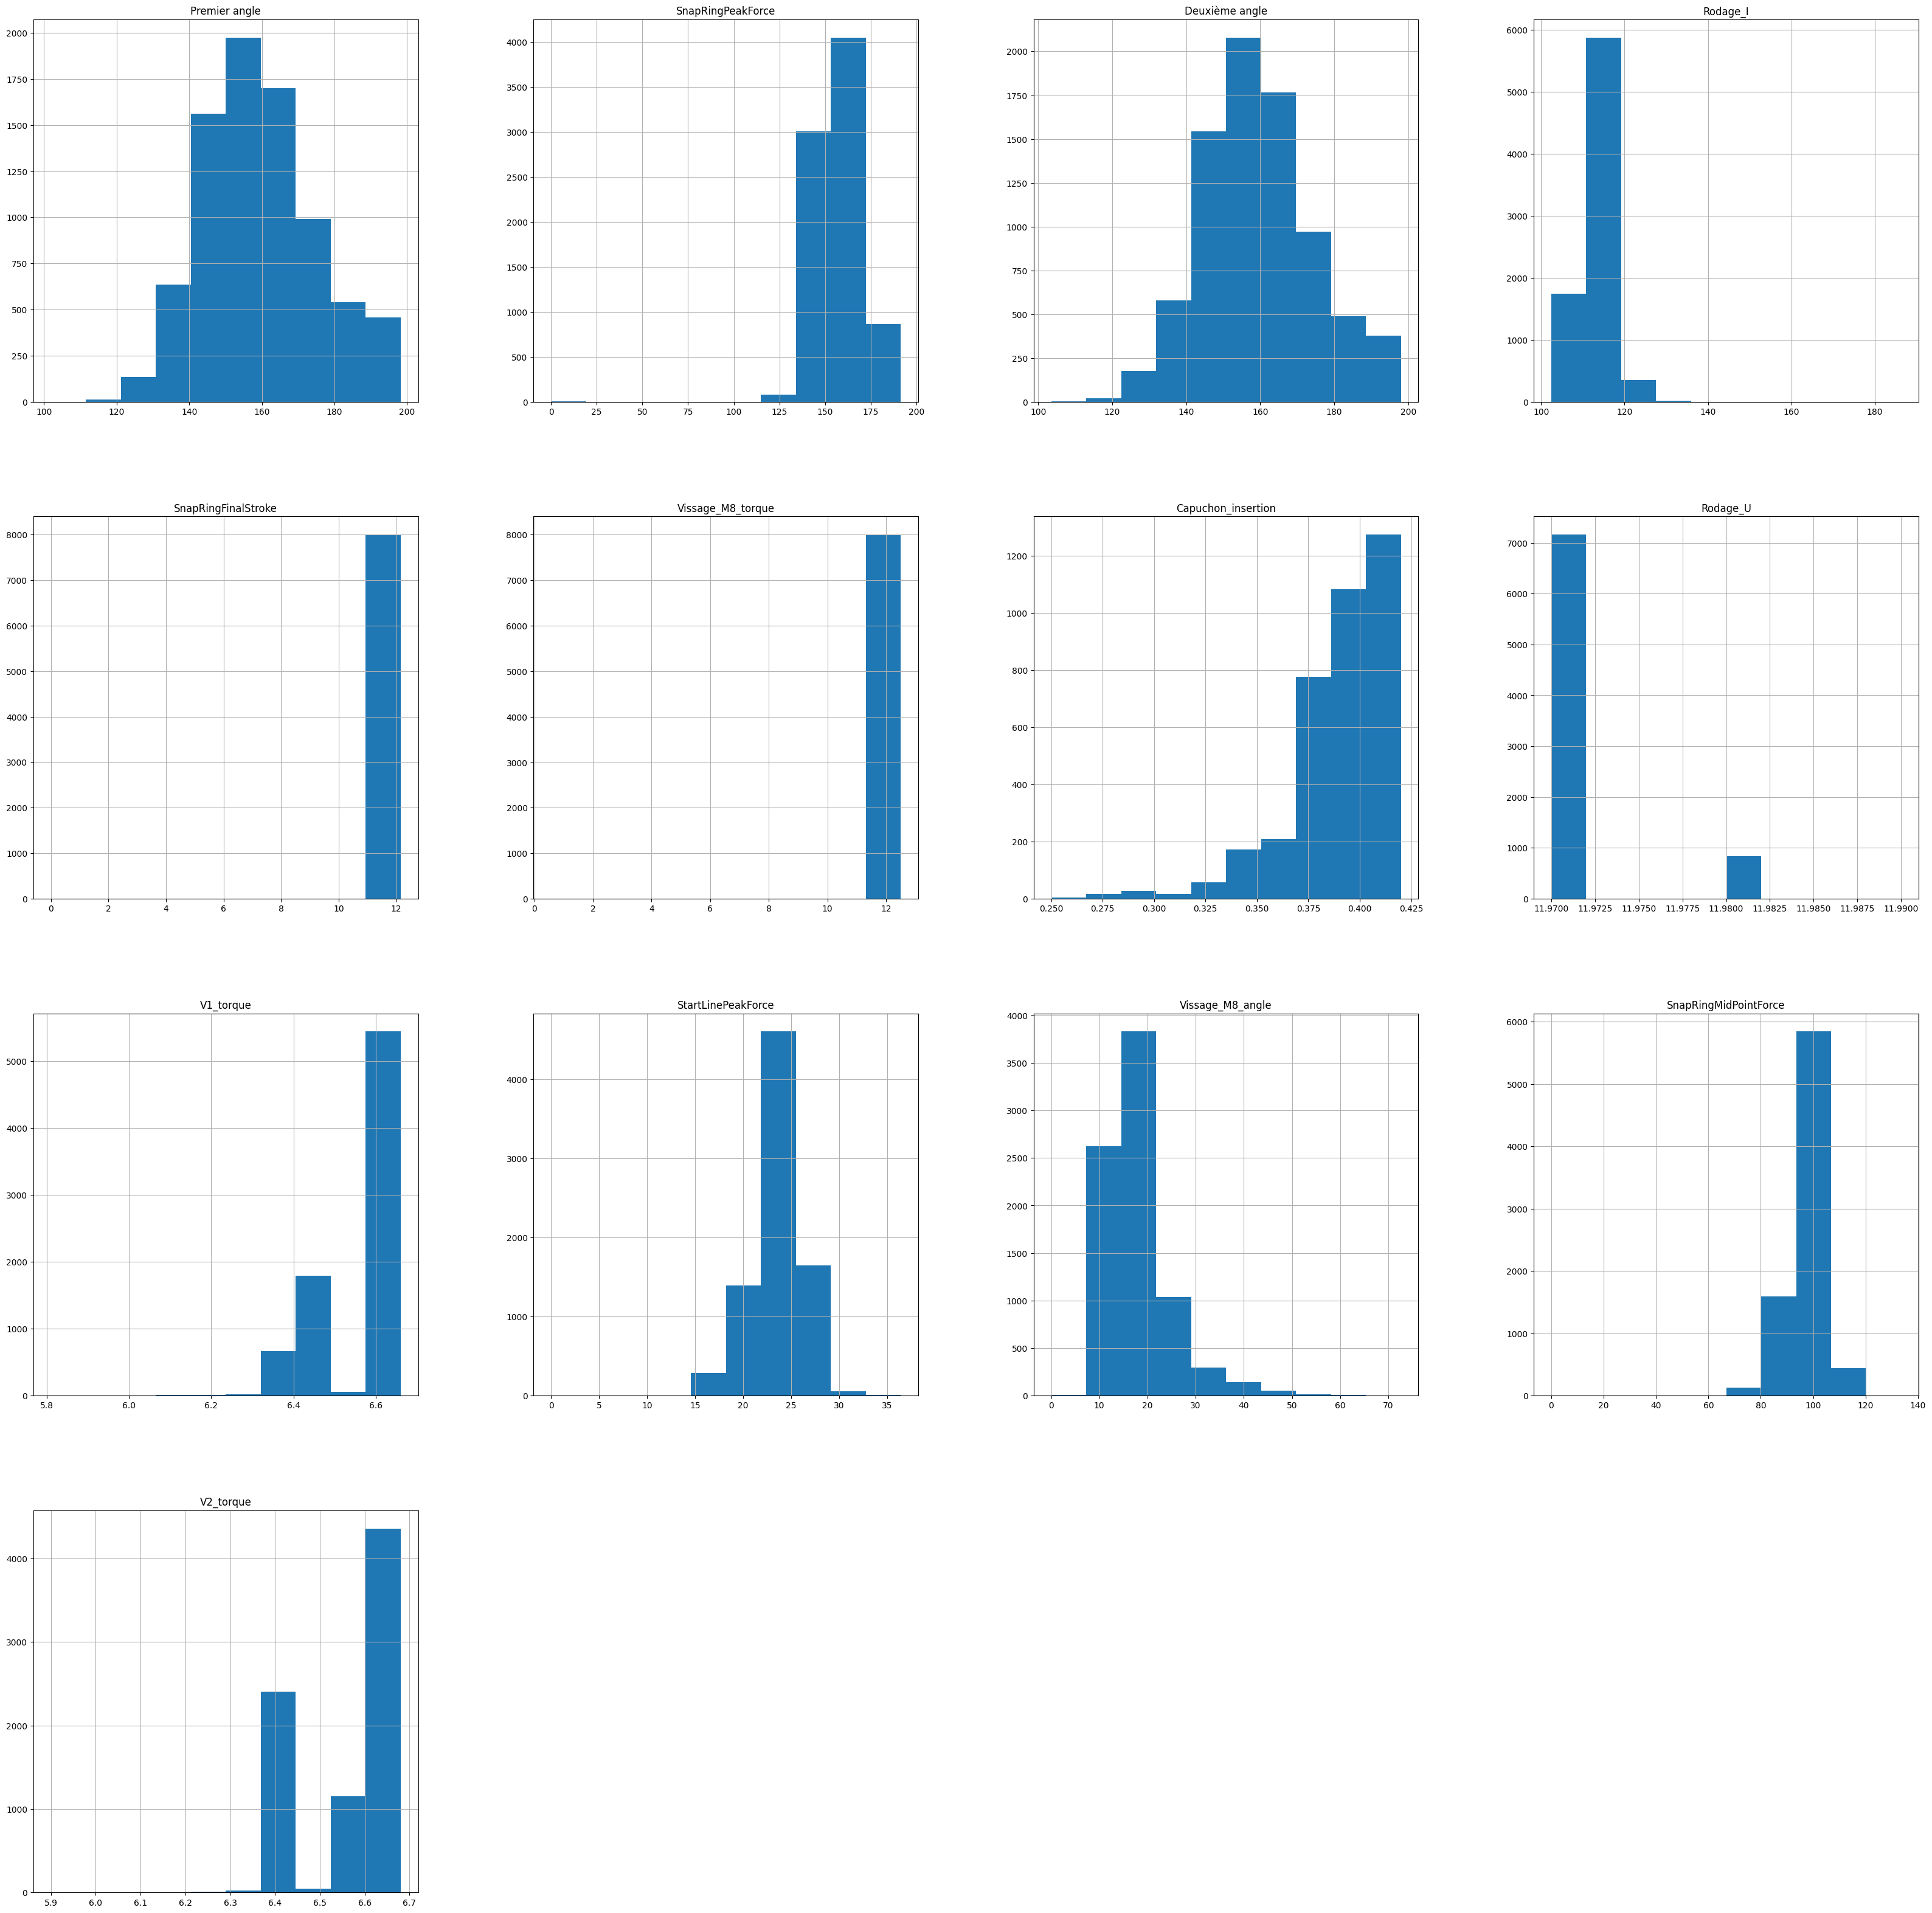

In [20]:
df_test_inputs.hist(layout = (4, 4), figsize = (40,40))

Histogram Training outputs

array([[<Axes: title={'center': 'Binar OP130_Resultat_Global_v'}>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

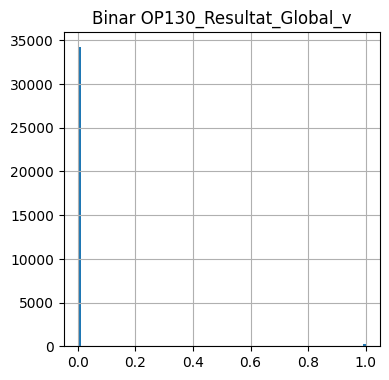

In [21]:
df_training_output.hist(bins = 100, layout = (4, 4), figsize = (20,20))

**BoxPlot**

Training Inputs

In [22]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2023-05-15 08:09:58--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-05-15 08:09:59 (24.9 MB/s) - ‘visualization.py’ saved [13023/13023]



In [29]:
help(visualization)

Help on module visualization:

NAME
    visualization

FUNCTIONS
    evaluate_anomaly_detector(y_train, anomaly_scores, threshold_selected=None)
        Evaluates the results from anomaly detection
    
    false_positive_rate(y_true, y_pred)
    
    plot_conf_mat(y_true, y_pred, class_names, normalize=True, title=None, cmap=<matplotlib.colors.ListedColormap object at 0x7f7ac32af0d0>, text=True, width=8, height=8)
        This function prints and plots the confusion matrix.
        In case of errors, you may need to do 
                        class_names = np.array(class_names)
        before calling this function.
        
        
        Parameters:
        --------------------------
        target: The array of the true categories. It contains as many values 
                        as the number of samples. Each value is an integer number 
                        corresponding to a certain category. This array represents 
                        the true category of each sample.

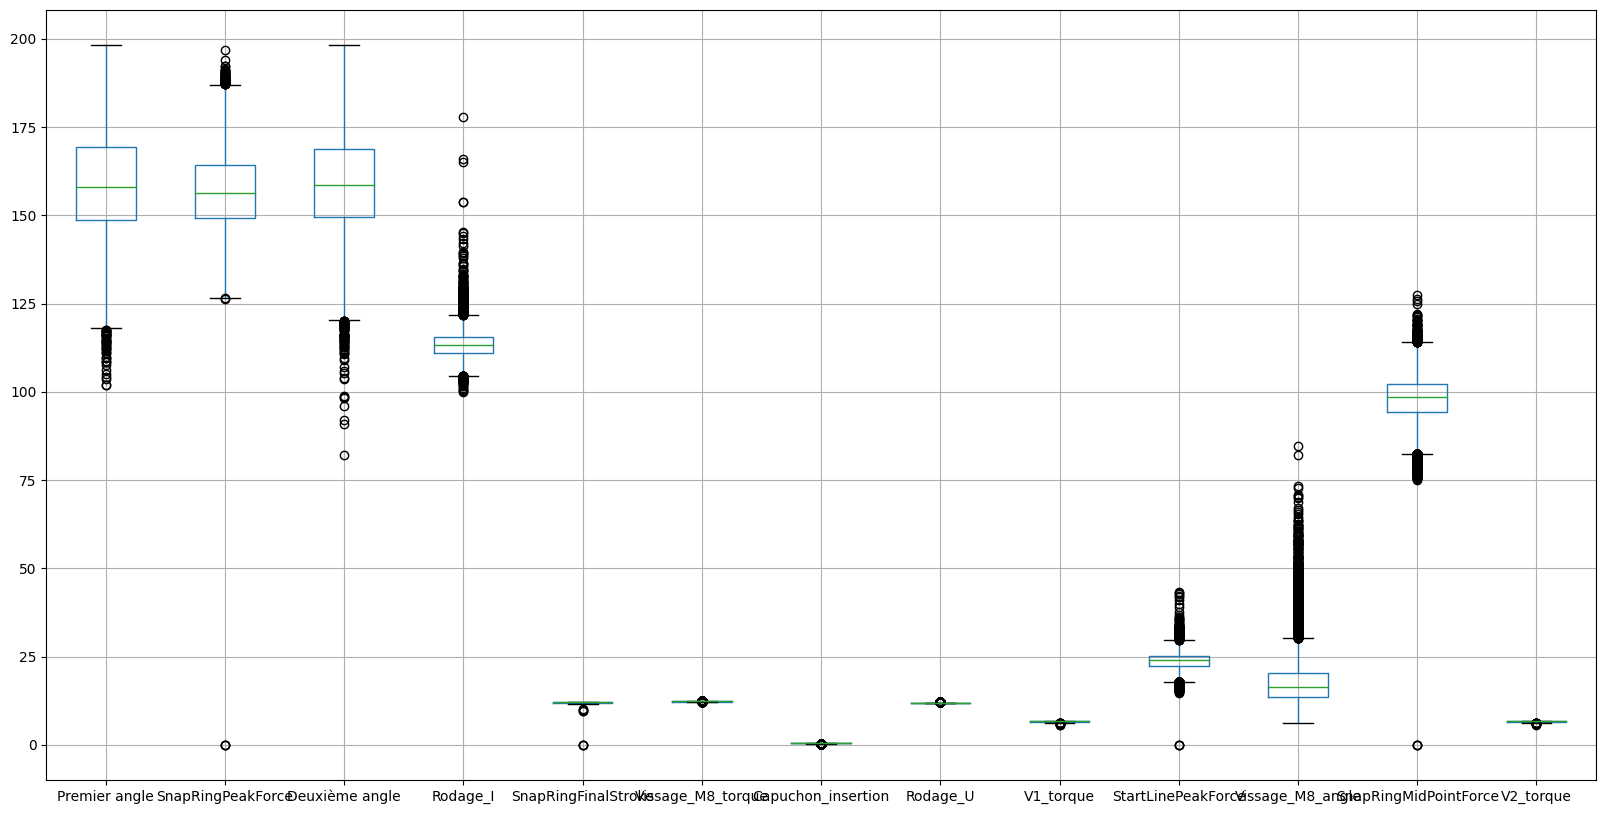

In [26]:
bp = df_training_inputs.boxplot(figsize=(20,10))

<Axes: >

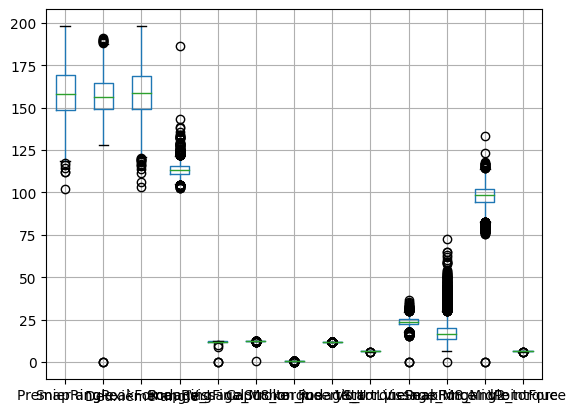

In [27]:
df_test_inputs.boxplot()

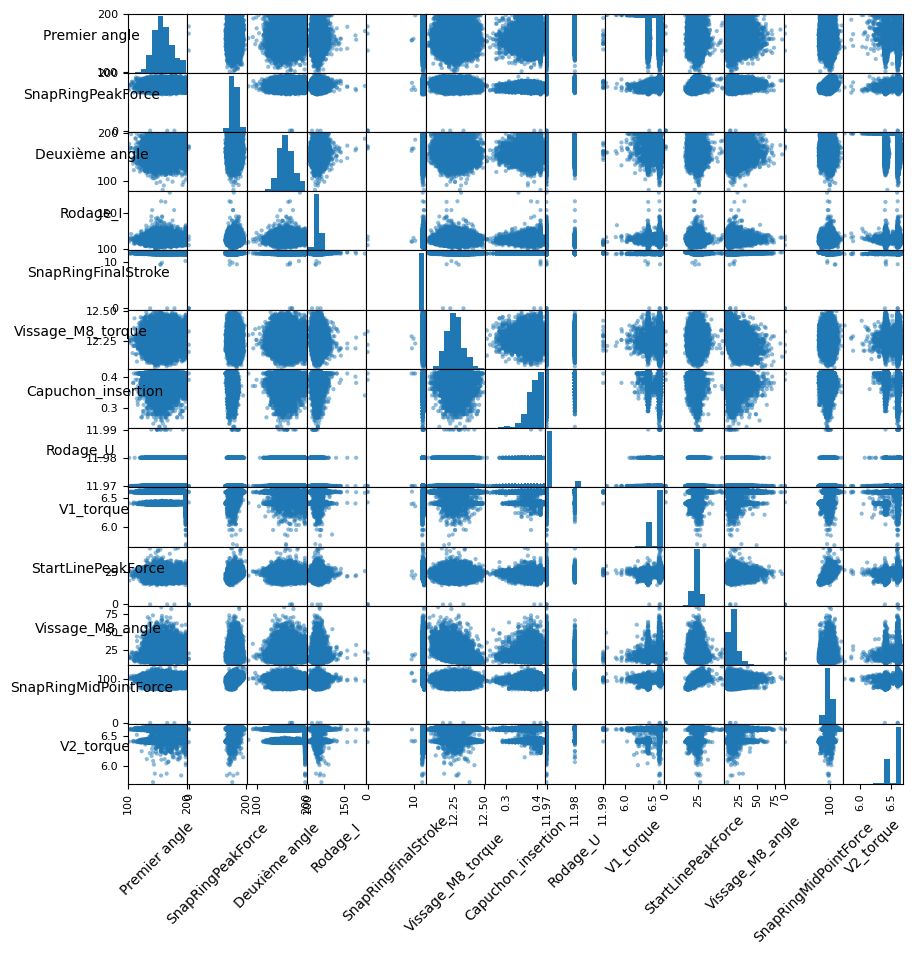

In [36]:
sm = scatter_matrix(df_training_inputs,
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

In [50]:
cols_to_transform = ['Rodage_I','Rodage_U','Vissage_M8_angle'];

cols_transformed = [s + "_log" for s in cols_to_transform]


df_training_inputs[cols_transformed] = df_training_inputs[cols_to_transform].transform(
                        func=lambda x : np.log(x))

In [57]:
df_training_inputs_transf = df_training_inputs.copy()
for feature in cols_to_transform:
 del df_training_inputs_transf[feature]
    
for feature in cols_transformed:
  df_training_inputs_transf[feature]

N'ai rien changé

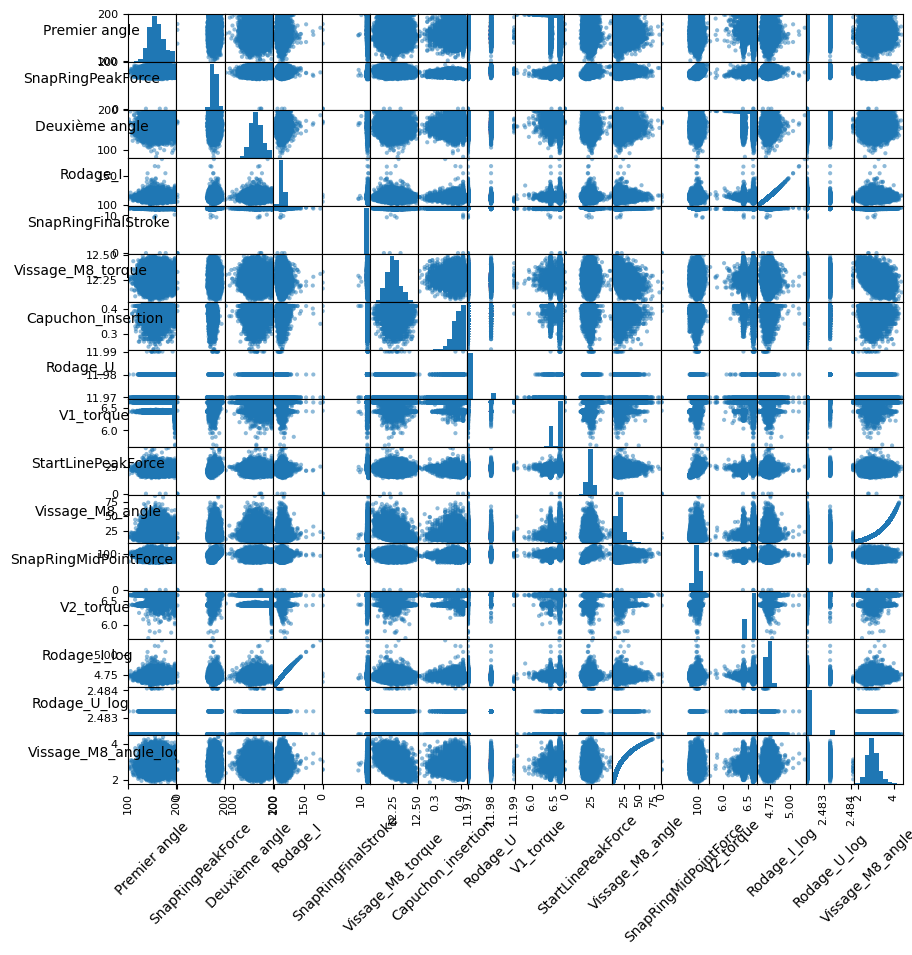

In [58]:
sm = scatter_matrix(df_training_inputs,
                   figsize=(10,10))
visualization.rotate_labels(sm)
plt.show()

In [61]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

help(feature_engineering)

--2023-05-15 10:10:17--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py.1’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2023-05-15 10:10:17 (28.9 MB/s) - ‘feature_engineering.py.1’ saved [2206/2206]

Help on module feature_engineering:

NAME
    feature_engineering

FUNCTIONS
    get_features_correlated_to_target(df, target_feature)
        Returns the Pearson's correlation coefficient between the 
        features and the target
        
        Parameters
        ------------
        df_: dataframe
        
        target_feature: string
  

In [63]:
feature_engineering.get_features_correlated_to_target(df_training_inputs,
                                    target_feature='Premier angle').head(10)

/content/feature_engineering.py:79: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr().round(2)


Premier angle            1.00
Deuxième angle           0.19
SnapRingFinalStroke     -0.09
SnapRingMidPointForce    0.07
V2_torque                0.07
StartLinePeakForce       0.06
Rodage_I                 0.04
Rodage_I_log             0.04
Vissage_M8_torque       -0.02
Capuchon_insertion      -0.02
Name: Premier angle, dtype: float64